In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gpdc import *
import statsmodels.api as sm
from scipy.io import wavfile
import statsmodels as sm
import scipy.signal as ss

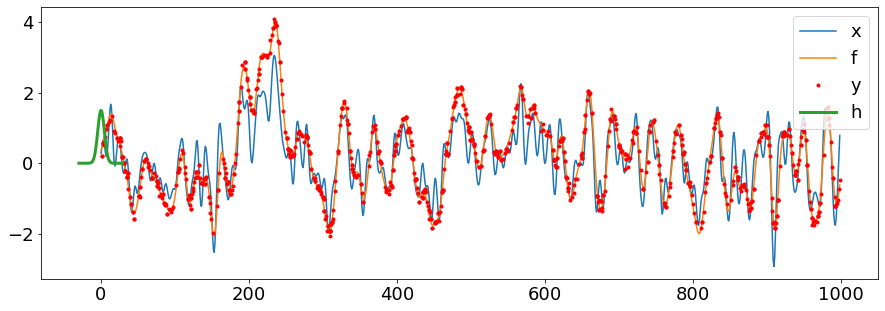

In [2]:
# generate data

gpc0 = gpc('RBF-RBF')
N_data = 1000
times_x = np.arange(0,N_data,1)
x = gpc0.sample_x(times_x, params = [1,15], how_many=1)
times_h = np.arange(-30,30,1)
h = 0.15*np.exp(-(1/(2*20))*(times_h)**2)
f = np.convolve(x.flatten(),h,mode='same')
sigma_noise = 0.1
y = f + sigma_noise*np.random.randn(len(times_x))
idx = np.random.choice(len(times_x), 1000)
times_y = times_x[idx]
y = y[idx]
plt.plot(times_x, x, label = 'x');
plt.plot(times_x, f, label = 'f');
plt.plot(times_y, y, '.r', label = 'y');
plt.plot(times_h, 10*h, lw=3, label = 'h');
plt.legend()

In [3]:
#instantiate model, load data, pass filter params (non-blind case) and train 

my_gpc = gpc('RBF-RBF')

my_gpc.load(times_y,y)
my_gpc.set_filter_params([0.15,20])
my_gpc.train_sparse(m=350)

training GPDC using RBF-RBF VGP with 350 inducing points
initial hypers: [ 2.1261815  10.59263073 -4.37610867]
Hyperparameters are:
sigma2 =0.8089022672596102
lenghtscale2 =23.541794284770607
sigma2_n =0.009401393008457375


(0.0, 500.0)

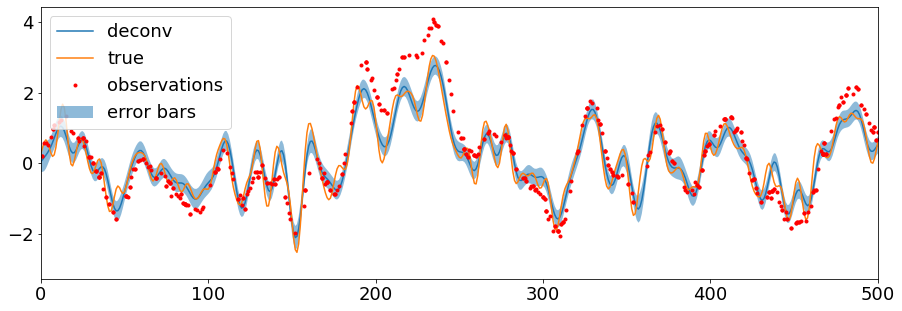

In [4]:
# plot deconvolution with sparse representation and learnt parameters
x_hat, V_hat, u_hat = my_gpc.predict_VSGP(times_x)
plt.plot(times_x, x_hat, label = 'deconv')
error_bars = np.sqrt(np.diag(V_hat))
plt.fill_between(times_x, x_hat-2*error_bars, x_hat+2*error_bars, label = 'error bars', alpha=0.5)
plt.plot(times_x, x, label = 'true')
#plt.stem(np.linspace(np.min(times_y),np.max(times_y), 400), u_hat, label = 'induc')
plt.plot(times_y, y, '.r', label='observations')
plt.legend()
plt.xlim([0,500])

(0.0, 500.0)

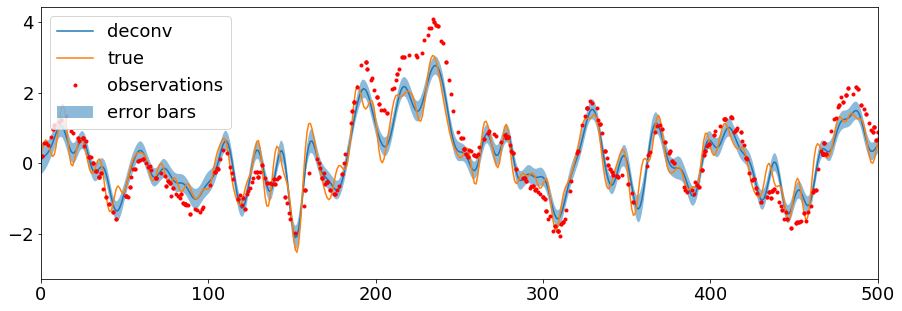

In [5]:
# plot deconvolution with all data and learnt parameters

x_hat2, V_hat2 = my_gpc.predict(times_x)
plt.plot(times_x, x_hat2, label = 'deconv')
error_bars = np.sqrt(np.diag(V_hat2))
plt.fill_between(times_x, x_hat2-2*error_bars, x_hat2+2*error_bars, label = 'error bars', alpha=0.5)
plt.plot(times_x, x, label = 'true')
plt.plot(times_y, y, '.r', label='observations')
#plt.plot(times_y, y, '.r', label = 'y');
plt.legend()
plt.xlim([0,500])

(0.0, 500.0)

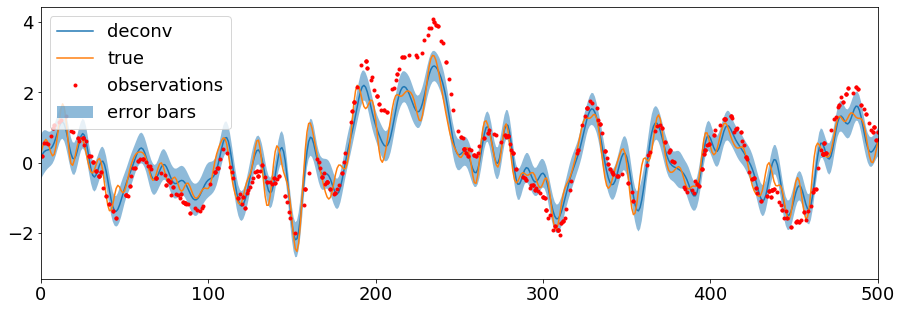

In [6]:
# plot deconvolution with all data and TRUE parameters


my_gpc.params = np.array((1, 15, 0.1**2))
x_hat2, V_hat2 = my_gpc.predict(times_x)
plt.plot(times_x, x_hat2, label = 'deconv')
error_bars = np.sqrt(np.diag(V_hat2))
plt.fill_between(times_x, x_hat2-2*error_bars, x_hat2+2*error_bars, label = 'error bars', alpha=0.5)
plt.plot(times_x, x, label = 'true')
plt.plot(times_y, y, '.r', label='observations')
#plt.plot(times_y, y, '.r', label = 'y');
plt.legend()
plt.xlim([0,500])